In [3]:
!pip install plotly

In [20]:

!pip install cython
!pip install "pystan<2.18"
!pip install fbprophet 

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\greybot\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\greybot\\AppData\\Local\\Temp\\pip-install-4ni2wi39\\pystan\\setup.py'"'"'; __file__='"'"'C:\\Users\\greybot\\AppData\\Local\\Temp\\pip-install-4ni2wi39\\pystan\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\greybot\AppData\Local\Temp\pip-wheel-o09k6p4d'
       cwd: C:\Users\greybot\AppData\Local\Temp\pip-install-4ni2wi39\pystan\
  Complete output (16220 lines):
  Compiling pystan/_api.pyx because it depends on C:\Users\greybot\anaconda3\lib\site-packages\Cython\Includes\libcpp\string.pxd.
  Compiling pystan/_chains.pyx because it depends on C:\Users\greybot\anaconda3\lib\site-packages\Cython\Includes\libcpp\vector.pxd.
  [1/2] Cythonizing pystan/_chains.pyx
  [2/2]


  Running setup.py clean for pystan
Failed to build pystan
    Running setup.py install for pystan: started
    Running setup.py install for pystan: finished with status 'error'



  copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail\is_converter.hpp -> build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail\is_fun.hpp -> build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail\is_string.hpp -> build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail\range.hpp -> build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\convert\detail
  creating build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\core
  copying pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\core\addressof.hpp -> build\lib.win-amd64-3.8\pystan\stan\lib\stan_math\lib\boost_1.64.0\boost\core
  copying pystan\stan\lib\stan_math\lib

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)


ERROR: Could not find a version that satisfies the requirement httpstan<4.8,>=4.7 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1)
ERROR: No matching distribution found for httpstan<4.8,>=4.7 (from pystan>=2.14->fbprophet)


In [22]:
print(np.__version__)

1.19.2


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import urllib.request
import datetime
import json
import glob
import sys
import os

# from fbprophet import Prophet

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.grid'] = False

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)
pd.set_option('display.width', 100)

pd.options.display.float_format = '{:.2f}'.format

In [16]:
class NaverDataLabOpenAPI():
    """
    네이버 데이터랩 오픈 API 컨트롤러 클래스
    """

    def __init__(self, client_id, client_secret):
        """
        인증키 설정 및 검색어 그룹 초기화
        """
        self.client_id = client_id
        self.client_secret = client_secret
        self.keywordGroups = []
        self.url = "https://openapi.naver.com/v1/datalab/search"
        
    def add_keyword_groups(self, group_dict):
        """
        검색어 그룹 추가
        """

        keyword_gorup = {
            'groupName': group_dict['groupName'],
            'keywords': group_dict['keywords']
        }

        self.keywordGroups.append(keyword_gorup)
        print(f">>> Num of keywordGroups: {len(self.keywordGroups)}")
  
    def get_data(self, startDate, endDate, timeUnit, device, ages, gender):
        """
        요청 결과 반환
        """

        # Request body
        body = json.dumps({
            "startDate": startDate,
            "endDate": endDate,
            "timeUnit": timeUnit,
            "keywordGroups": self.keywordGroups,
            "device": device,
            "ages": ages,
            "gender": gender
        }, ensure_ascii=False)
        
        # Results
        request = urllib.request.Request(self.url)
        request.add_header("X-Naver-Client-Id",self.client_id)
        request.add_header("X-Naver-Client-Secret",self.client_secret)
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            # Json Result
            result = json.loads(response.read())
            
            df = pd.DataFrame(result['results'][0]['data'])[['period']]
            for i in range(len(self.keywordGroups)):
                tmp = pd.DataFrame(result['results'][i]['data'])
                tmp = tmp.rename(columns={'ratio': result['results'][i]['title']})
                df = pd.merge(df, tmp, how='left', on=['period'])
            self.df = df.rename(columns={'period': '날짜'})
            self.df['날짜'] = pd.to_datetime(self.df['날짜'])
            
        else:
            print("Error Code:" + rescode)
            
        return self.df
    def plot_daily_trend(self):
        """
        일 별 검색어 트렌드 그래프 출력
        """
        colList = self.df.columns[1:]
        n_col = len(colList)

        fig = plt.figure(figsize=(12,6))
        plt.title('일 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=self.df['날짜'], y=self.df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        
        return fig
    
    def plot_monthly_trend(self):
        """
        월 별 검색어 트렌드 그래프 출력
        """
        df = self.df.copy()
        df_0 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(0).reset_index().rename(columns={'날짜': '월'})
        df_1 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(1).reset_index().rename(columns={'날짜': '년도'})

        df = pd.merge(df_1[['년도']], df_0, how='left', left_index=True, right_index=True)
        df['날짜'] = pd.to_datetime(df[['년도','월']].assign(일=1).rename(columns={"년도": "year", "월":'month','일':'day'}))
        
        colList = df.columns.drop(['날짜','년도','월'])
        n_col = len(colList)
                
        fig = plt.figure(figsize=(12,6))
        plt.title('월 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=df['날짜'], y=df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        
        return fig
    
    def plot_pred_trend(self, days):
        """
        검색어 그룹 별 시계열 트렌드 예측 그래프 출력
        days: 예측일수
        """
        colList = self.df.columns[1:]
        n_col = len(colList)
        
        fig_list = []
        for i in range(n_col):
            
            globals()[f"df_{str(i)}"] = self.df[['날짜', f'{colList[i]}']]
            globals()[f"df_{str(i)}"] = globals()[f"df_{str(i)}"].rename(columns={'날짜': 'ds', f'{colList[i]}': 'y'})

            m = Prophet()
            m.fit(globals()[f"df_{str(i)}"])

            future = m.make_future_dataframe(periods=days)
            forecast = m.predict(future)
            forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
            
            globals()[f"fig_{str(i)}"] = m.plot(forecast, figsize=(12,6))
            plt.title(colList[i], size=20, weight='bold')
            
            fig_list.append(globals()[f"fig_{str(i)}"])
            
        return fig_list

In [46]:
keyword_group_set = {
    'keyword_group_1': {'groupName': "로우로우", 'keywords': ["RAWROW","로우로우","rawrow"]},
    'keyword_group_2': {'groupName': "로우클래식", 'keywords': ["LOW CLASSIC","로우클래식","low classic"]},
    'keyword_group_3': {'groupName': "소미노", 'keywords': ["SOMINO","소미노","somino"]},
    'keyword_group_4': {'groupName': "로지텍", 'keywords': ["LOGITECH","로지텍","logitech"]},
    'keyword_group_5': {'groupName': "시샵코리아", 'keywords': ["C SHARP KOREA","시샵코리아","c sharp korea"]}
}

In [47]:
client_id = "Q31F5YKw5ZYDHQTQvc2Q"
client_secret = "JrusnOW_ix"

# 요청 파라미터 설정
startDate = "2022-05-01"
endDate = "2022-05-26"
timeUnit = 'date'
device = ''
ages = []
gender = ''

# 데이터 프레임 정의
naver = NaverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

naver.add_keyword_groups(keyword_group_set['keyword_group_1'])
naver.add_keyword_groups(keyword_group_set['keyword_group_2'])
naver.add_keyword_groups(keyword_group_set['keyword_group_3'])
naver.add_keyword_groups(keyword_group_set['keyword_group_4'])
naver.add_keyword_groups(keyword_group_set['keyword_group_5'])

df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)

>>> Num of keywordGroups: 1
>>> Num of keywordGroups: 2
>>> Num of keywordGroups: 3
>>> Num of keywordGroups: 4
>>> Num of keywordGroups: 5


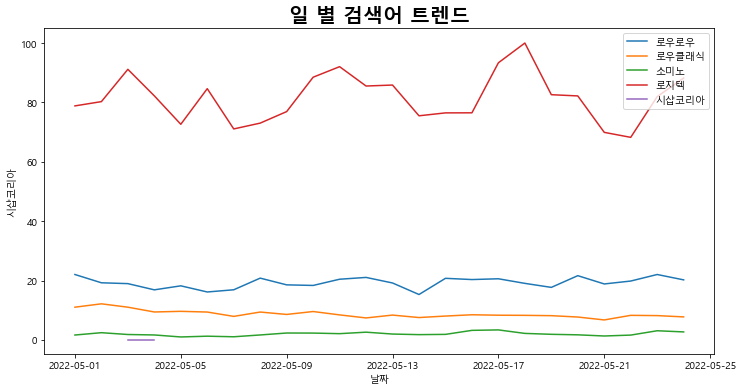

In [48]:
fig_1 = naver.plot_daily_trend()

In [50]:
client_id = "Q31F5YKw5ZYDHQTQvc2Q"
client_secret = "JrusnOW_ix"

# 요청 파라미터 설정
startDate = "2022-05-01"
endDate = "2022-05-26"
timeUnit = 'date'
device = ''
ages = []
gender = 'f'

# 데이터 프레임 정의
naver = NaverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

naver.add_keyword_groups(keyword_group_set['keyword_group_1'])
naver.add_keyword_groups(keyword_group_set['keyword_group_2'])
naver.add_keyword_groups(keyword_group_set['keyword_group_3'])
naver.add_keyword_groups(keyword_group_set['keyword_group_4'])
naver.add_keyword_groups(keyword_group_set['keyword_group_5'])

df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)

>>> Num of keywordGroups: 1
>>> Num of keywordGroups: 2
>>> Num of keywordGroups: 3
>>> Num of keywordGroups: 4
>>> Num of keywordGroups: 5


In [54]:
gender = 'm'
df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)

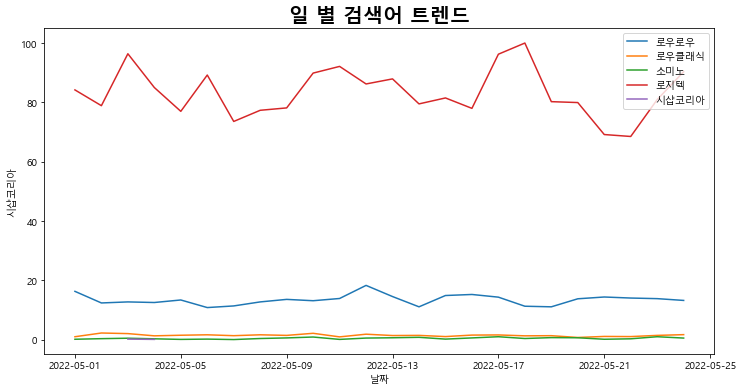

In [55]:
fig_3 = naver.plot_daily_trend()